In [ ]:
#!pip install tensorflow


In [2]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import sklearn
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('creditfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


[0.13501016 0.12577772 0.12031404]


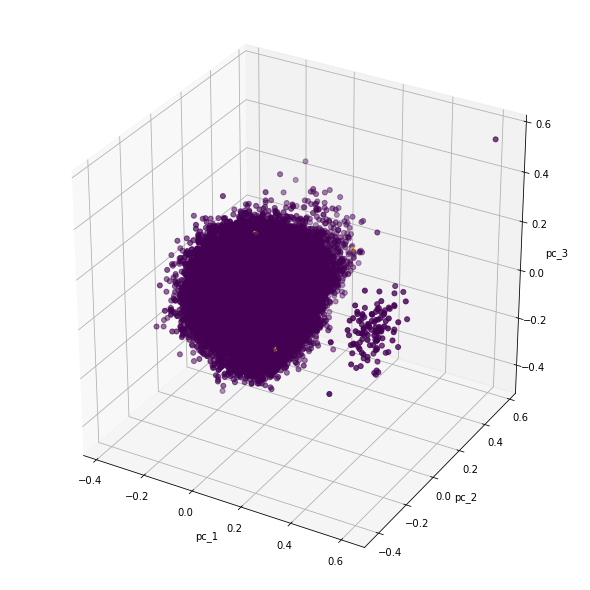

In [4]:
import sklearn
from sklearn.decomposition import PCA
import mpl_toolkits
def show_pca_df(df):
	x = df[df.columns[1:30]].to_numpy()
	y = df[df.columns[30]].to_numpy()

	x = sklearn.preprocessing.MinMaxScaler().fit_transform(x)
	pca = PCA(n_components=3)
	pca_result = pca.fit_transform(x)
	print(pca.explained_variance_ratio_)

	pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
	pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)

	ax = mpl_toolkits.mplot3d.axes3d.Axes3D(plt.figure(figsize=(8, 8)))
	ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
	ax.set_xlabel("pc_1")
	ax.set_ylabel("pc_2")
	ax.set_zlabel("pc_3")
	plt.show()
    
show_pca_df(df)

[0.20577961 0.14728955 0.09800457]


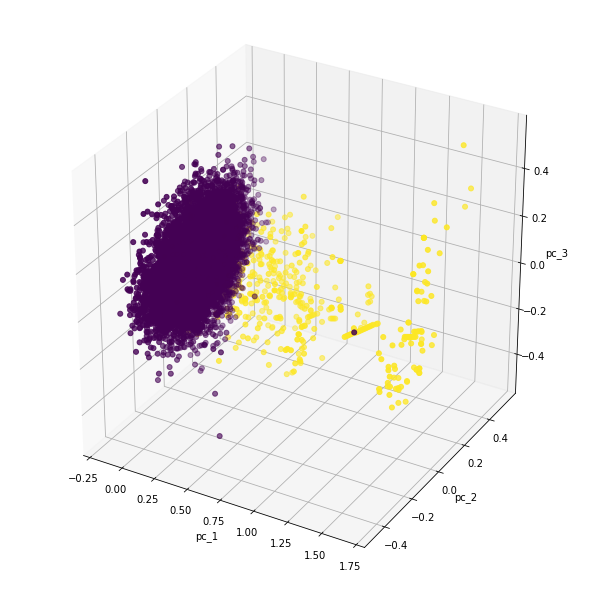

In [5]:
df_anomaly = df[df[df.columns[30]] > 0]
df_normal = df[df[df.columns[30]] == 0].sample(n=df_anomaly.size, random_state=1, axis='index')
df2 = pd.concat([ df_anomaly, df_normal])

show_pca_df(df2)

In [206]:
X = df[df.columns[1:30]]
print(len(X))
y = df[df.columns[30]]
pd.Series(y).value_counts()

284807


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from dataprep.eda import create_report
from dataprep.eda import plot
#plot(df[['AVG_REWARD_AMOUNT', 'MAX_REWARD_AMOUNT', 'SOURCE_PAYOUT_AMOUNT',
#      'MIN_REWARD_AMOUNT', 'MEDIAN_REWARD_AMOUNT','AVG_SURVEY_LENGTH','MAX_SURVEY_LENGTH','MEDIAN_SURVEY_LENGTH']])
report = create_report(df, title='My Report')
report.show_browser()

  0%|                                                                                         | 0/5946 [00:00<…

In [207]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

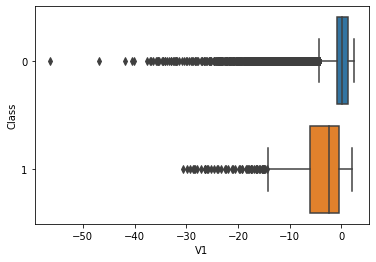

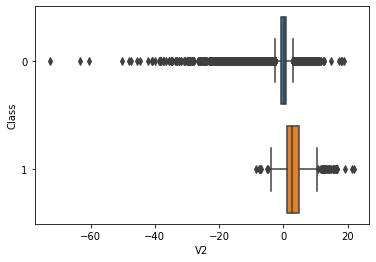

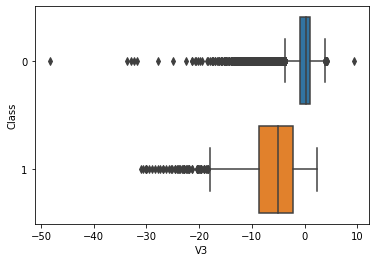

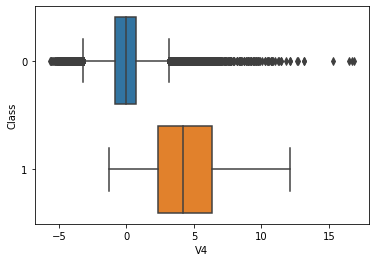

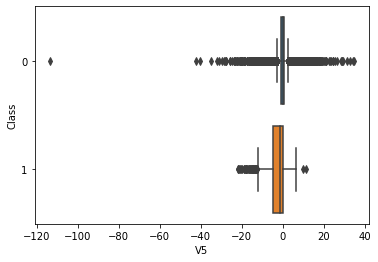

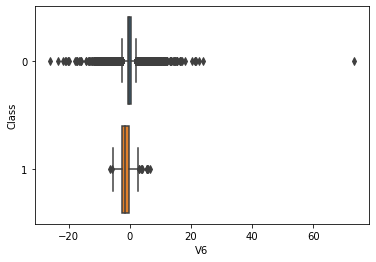

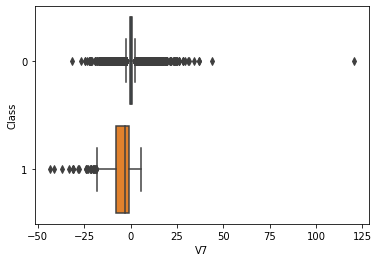

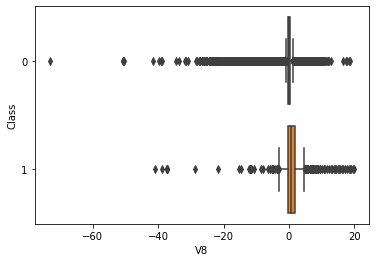

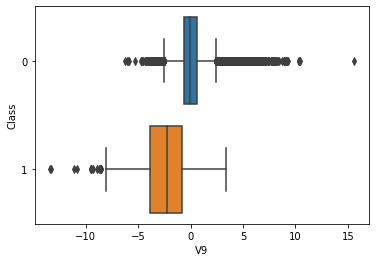

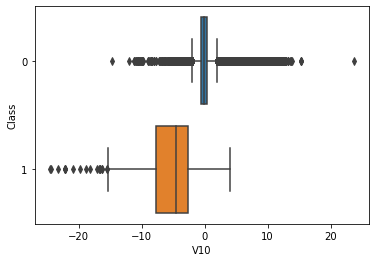

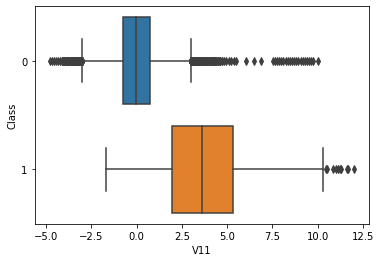

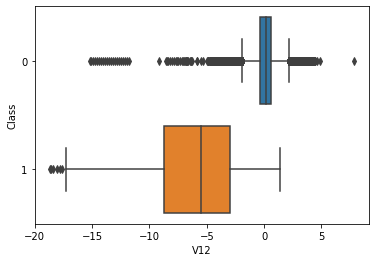

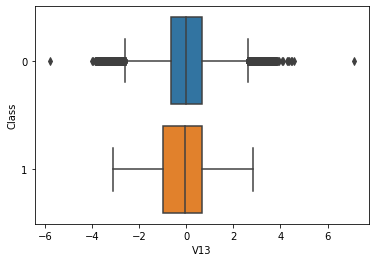

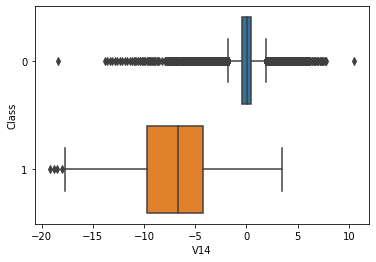

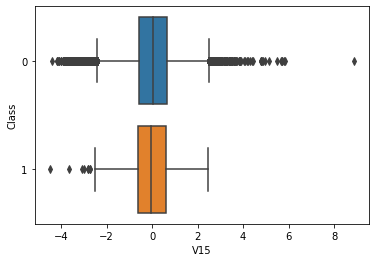

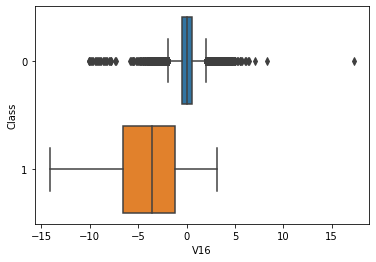

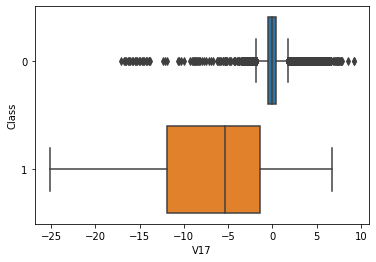

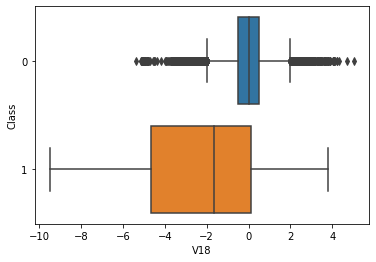

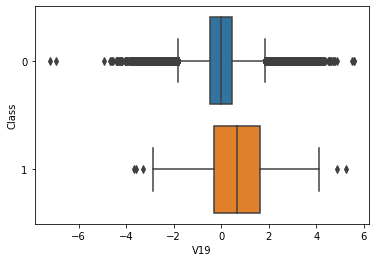

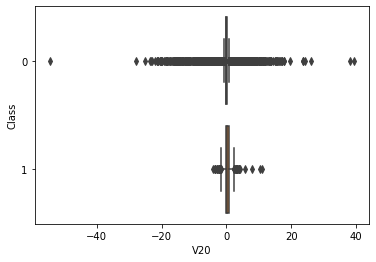

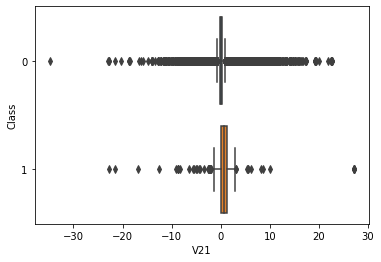

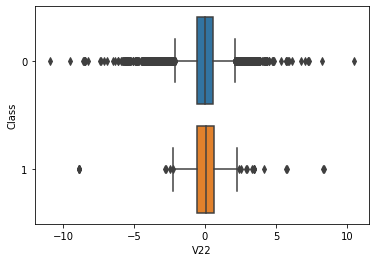

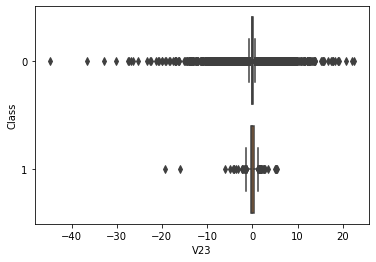

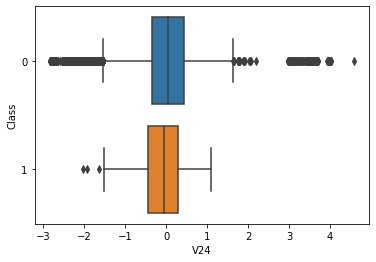

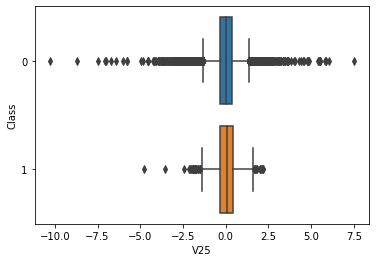

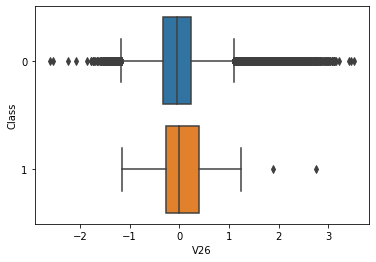

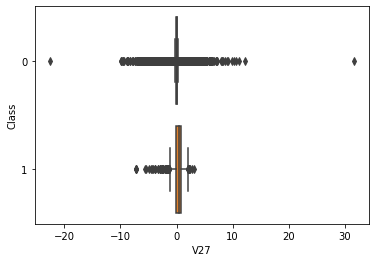

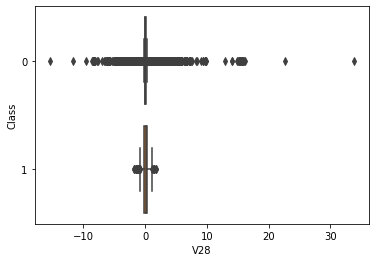

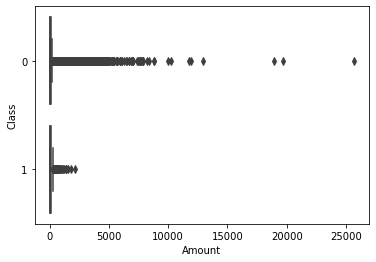

In [208]:
import seaborn as sns
for c in X.columns:
    sns.boxplot( x=X[c],y=y, orient='h',showfliers = True)
    plt.show()

In [200]:
from sklearn.model_selection import train_test_split
X, test, y, y_test = train_test_split(X, y, stratify=y, test_size=.15)
scaler = sklearn.preprocessing.MinMaxScaler()
scaler = sklearn.preprocessing.RobustScaler()
scaler = sklearn.preprocessing.StandardScaler()
X  = pd.DataFrame(scaler.fit_transform(X[train_cols]), columns=train_cols)
test = pd.DataFrame(scaler.transform(test[train_cols]), columns=train_cols)
X.shape

(107413, 13)

In [201]:
from sklearn.feature_selection import SelectKBest, chi2,SelectFromModel
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
for v in [sklearn.svm.LinearSVC(), LogisticRegression(penalty="l2"),]:
    kb = SelectFromModel(v) 
    kb.fit(X, y)
    print(X.columns[kb.get_support(True)])

Index(['V14', 'V16', 'V10', 'V4', 'V17'], dtype='object')
Index(['V14', 'V16', 'V10', 'V4', 'V13'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [191]:
train_cols = list(set(['V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17'] + ['V1', 'V4', 'V5', 'V8', 'V10', 'V12', 'V14', 'V17', 'V21']))
train_cols = X.columns

In [194]:
import keras
from keras import layers

input_s = layers.Input(shape=(X.shape[1]))
encoded = layers.Dense(20, activation='relu')(input_s)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(5, activation='relu')(encoded)

decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(20, activation='relu')(decoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(X.shape[1], activation='sigmoid')(decoded)

autoencoder = keras.Model(input_s, decoded)
autoencoder.compile(
  loss='mse',
  optimizer='adam',
  metrics=['mse'])

autoencoder.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_84 (Dense)             (None, 20)                280       
_________________________________________________________________
dropout_36 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_37 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_87 (Dense)             (None, 10)              

Epoch 1/20
3950/3950 [==============================] - 4s 1ms/step - loss: 0.9892 - mse: 0.9892 - val_loss: 0.9716 - val_mse: 0.9716
Epoch 2/20
3950/3950 [==============================] - 4s 972us/step - loss: 0.9519 - mse: 0.9519 - val_loss: 0.9616 - val_mse: 0.9616
Epoch 3/20
3950/3950 [==============================] - 4s 966us/step - loss: 0.9456 - mse: 0.9456 - val_loss: 0.9585 - val_mse: 0.9585
Epoch 4/20
3950/3950 [==============================] - 4s 977us/step - loss: 0.9429 - mse: 0.9429 - val_loss: 0.9580 - val_mse: 0.9580
Epoch 5/20
3950/3950 [==============================] - 4s 993us/step - loss: 0.9414 - mse: 0.9414 - val_loss: 0.9577 - val_mse: 0.9577
Epoch 6/20
3950/3950 [==============================] - 4s 1ms/step - loss: 0.9389 - mse: 0.9389 - val_loss: 0.9503 - val_mse: 0.9503
Epoch 7/20
3950/3950 [==============================] - 4s 1ms/step - loss: 0.9368 - mse: 0.9368 - val_loss: 0.9508 - val_mse: 0.9508


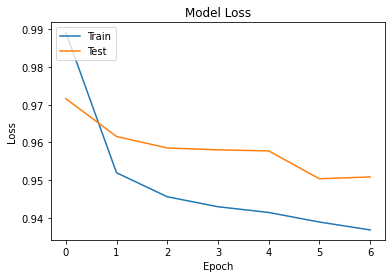

In [195]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
history = autoencoder.fit(x=X, y=X, epochs=20, verbose=1, validation_data=(test, test), callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [196]:
train_predicted_x = autoencoder.predict(x=X)
train_events_mse = keras.losses.mean_squared_error(X, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)
print(cut_off)

1.9839926481246937


In [44]:
len(y_test)
print(len(predicted))
test = test.drop(columns=['Target', 'MSE'])

42722


In [106]:
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Target,MSE,Outlier
0,0.994553,0.768369,0.796146,0.238820,0.772460,0.254730,0.269481,0.781339,0.457007,0.512273,0.328916,0.741715,0.476136,0.675682,0.313773,0.439401,0.710380,0.658266,0.612290,0.578528,0.564202,0.537512,0.664275,0.429460,0.606136,0.454001,0.414810,0.311384,0.000090,NaN,0.000555,False
1,0.946385,0.778107,0.841276,0.463848,0.768312,0.262576,0.268100,0.789890,0.393245,0.539124,0.196548,0.673261,0.400356,0.674163,0.341156,0.438740,0.746694,0.642024,0.672906,0.584959,0.561611,0.498916,0.671462,0.380092,0.514333,0.426953,0.423211,0.316538,0.003705,NaN,0.002776,False
2,0.993233,0.766512,0.818373,0.268626,0.765127,0.252054,0.266350,0.782173,0.480003,0.510114,0.239499,0.718684,0.446546,0.656009,0.344039,0.444943,0.723813,0.589766,0.575267,0.577788,0.556828,0.477528,0.670462,0.370597,0.560640,0.452765,0.415248,0.311881,0.000105,NaN,0.000425,False
3,0.979394,0.766103,0.846184,0.271314,0.763973,0.266765,0.262455,0.786779,0.483797,0.504270,0.219819,0.713773,0.483264,0.637540,0.393828,0.451926,0.723093,0.630050,0.552201,0.579296,0.562440,0.528605,0.662930,0.289121,0.606175,0.532564,0.416636,0.313222,0.000156,NaN,0.001147,False
4,0.945896,0.761640,0.835559,0.169192,0.767352,0.254984,0.263461,0.790351,0.443037,0.498533,0.165420,0.688395,0.415762,0.654115,0.278161,0.422433,0.711266,0.754691,0.398501,0.573437,0.558906,0.491623,0.667700,0.434974,0.547332,0.303962,0.416583,0.311817,0.001133,NaN,0.002912,False


In [197]:
predicted = autoencoder.predict(x=test)
ms =  keras.losses.mean_squared_error(test, predicted)

test_df = pd.DataFrame(test.copy(), columns=test.columns)
print(test_df.columns)
test_df['Target'] = y_test.values
test_df['MSE'] = ms
test_df['Outlier'] = test_df['MSE'] > cut_off
test_df['Outlier'].value_counts()

Index(['V14', 'V16', 'V1', 'V9', 'V10', 'V11', 'V4', 'V17', 'V21', 'V5', 'V8',
       'V12', 'V13'],
      dtype='object')


False    21166
True      1135
Name: Outlier, dtype: int64

In [120]:
type(y_test)

pandas.core.series.Series

In [188]:
print(test_df['Target'].value_counts())
print(pd.Series(y_test).value_counts())
test_df['Outlier'].value_counts()

0    26191
1       45
Name: Target, dtype: int64
0    26191
1       45
Name: Class, dtype: int64


False    24867
True      1369
Name: Outlier, dtype: int64

In [127]:
test_df['Target'].isnull().value_counts()
pd.Series(y_test).value_counts()
print(test_df.shape)
pd.Series(y_test).value_counts()

(42722, 32)


0    42648
1       74
Name: Class, dtype: int64

In [128]:
pd.crosstab(test_df['Target'], test_df['Outlier'])

Outlier,False,True
Target,,
0,40577,2071
1,9,65


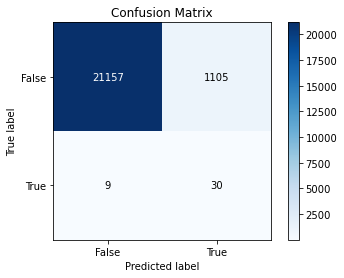

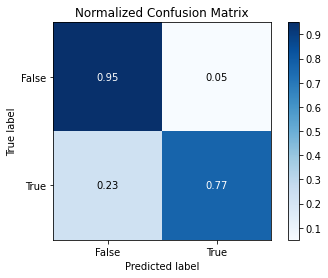

In [198]:
import scikitplot

scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=True)

Index(['V1', 'V4', 'V5', 'V8', 'V10', 'V12', 'V14', 'V17', 'V21'], dtype='object')
Index(['V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17'], dtype='object')


In [151]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(contamination=.05,random_state=0,n_jobs=7, n_estimators=200)
isf.fit(X)
test_df['outlier2'] = isf.predict(test)
test_df['outlier2'].value_counts()

 1    40590
-1     2132
Name: outlier2, dtype: int64

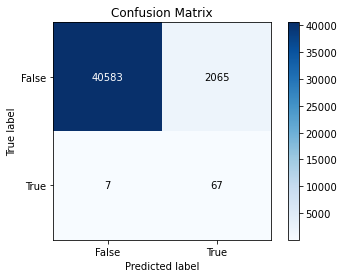

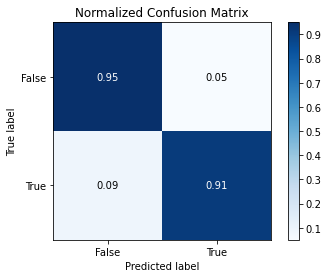

In [152]:
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['outlier2'] == -1, normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['outlier2'] == -1, normalize=True)